These notes are summary of Udacity's [AB Testing course](https://www.udacity.com/course/ab-testing--ud257)

*Notes are gathered from  [[VitoDH](https://vitodh.github.io/2019/12/28/AB-Testing-Introduction/)] and [[bangdasun](https://bangdasun.github.io/)] notes, and I've modified it further*

# AB Testing Course Notes
 
1. [Lesson 1 - Introduction](#introduction) <br>
2. [Lesson 2 - Ethics and Policy](#ethics)<br>
3. [Lesson 3 - Choosing Metrics](#choosing_metrics)<br>
4. [Lesson 4 - Design An Experiment](#design)<br>
5. [Lesson 5 - Analyzing Results](#results)<br>

# AB Testing - Lesson 1 - Introduction <a class="anchor" id="introduction"></a>



## 1. Overview

### What

A general methodology used online when you want to test a new product or a new feature.



### How

Take two sets of users,

* Control set, your existing product 
* Another set, your experiment, the new version

How do these two sets  respond differently?



### Useful when

* You want to climb to the peak of the current mountain 

eg.

* Movie recommendation site
* Change backend-page load time, results



### Not useful when

* not when you choose which mountain to climb(i.e. testing out new experiences)

* Short term A-B testing
 * user who don’t like change too much would prefer old version
 * user will feel excited and test out everything (novelty effect).
* Can't tell if you're missing something

eg.

* Online shopping service. Is item complete?
* New premium service
* To long to get repeat customers
* Update brand and logo

### The issues of using AB testing in these cases include:

* AB testing needs baseline - here it is hard to define
* AB testing cannot run forever - here it is hard to know when to stop

#### What are Complimentary for AB Testing?
- Retrospective Analysis
- User Experience Research
- Focus Group
- Surverys



## 2. Example

**Audacity**

* Create online finance courses
* User flow / Customer funnel
  * Homepage visits
  * Exploring the site
  * Create account
  * Complelte
* Experiment
  * **Hypothesis**: Changing the "start now" button from orange to pink will increase how many students explore the Audacity's courses





## 3. Choose a metric

Following the audacity example,



* Total number of courses completed
  * Too much time to accumulate, not practical
* Number of clicks  on specific button
  * The number of total clicks in old and new version is different
* **CTR(Click Through Rate)** Number of clicks on specific button / Number of page views
  * Maybe the page loads slowly and the visitor impatiently clicks 5 times
  * Use when deciding whether user progresses to the second level of the funnel: Homepage visits
* **Click through probability**: Unique visitors who click / Unique visitors who view the page
  * Use when deciding whether user progresses to the second level of the funnel: Exploring the site



Update hypothesis: Changing the "start now" button from orange to pink will increase the **Click Through Probability** of the button



## 4. Review statistics

### Which distribution?

* Binomial distribution
  * Click: success   No click: failure
  * Mean: p
  * Std: $\sqrt{\frac{p(1-p)}{N}}​$
  * $\hat p=\frac{X}{N}$
  * When  we can use?
    * 2 types of outcomes
    * Independent events
      * Clicks on a search result page is **not independent** because people will search again with slightly different word if they don't find the answer in the first search
      * Student completion of course after 2 months: can be assumed independent (exception: student creates 2 accounts; take courses with friends)
    * Identical distributions



### Confidence Interval

If we theoretically repeat the experiment over and over again, we would expect the interval we construct around our sample mean to cover the true value in the population 95% of the time



* To use normal, check $N\cdot \hat p > 5$ and $N\cdot (1-\hat p) > 5$
* Margin: $m=z\cdot\sqrt{\frac{\hat p(1-\hat p)}{N}} $
  * Large $\hat p$: Std will be smaller, distribution will be tighter, confidence interval will be smaller
  * Large $N$: Std will be smaller, distribution will be tighter, confidence interval will be smaller
  * When considering 95% confidence interval, z-score is 1.96



### Hypothesis Testing

Here the statistical hypothesis test part (distribution of metrics, confidence intervals, statistical significance, null / alternative hypothesis, standard error) is skipped.

In real world, statistical hypothesis test is just the first step. After this, more people will involved to determine what is the practically significance.

We want to calculate p(results due to change). We have two distribution: $p_{control}$ and $p_{exp}$(experiment)

* Null hypothesis: $p_{control} = p_{exp}$
* Alternative hypothesis: $p_{control} \neq p_{exp}$
* Measure $\hat p_{control}$ and $\hat p_{exp}$ and calculate $p(\hat p_{exp}-\hat p_{control}|H_0)$ and reject null if the previous p is below 0.05



#### Compare two samples

The quantitative task tells us whether it's likely that the difference we observed could have occurred by chance, or if it would be extremely unlikely to occur if the two sides are actually the same

* Variables we have:
<img src="https://render.githubusercontent.com/render/math?math=$X_{control},X_{exp},N_{control},N_{exp}$">

<img src="https://render.githubusercontent.com/render/math?math=$\hat p_{pool}=\frac{X_{control}+X_{exp}}{N_{control}+N_{exp}}$">
<img src="https://render.githubusercontent.com/render/math?math=$SE_{pool}=\sqrt{\hat p_{pool}(1-\hat p_{pool})\cdot(\frac{1}{N_{control}}+\frac{1}{N_{exp}})}$">
<img src="https://render.githubusercontent.com/render/math?math=$\hat d=\hat p_{exp}-\hat p_{control}$">
<img src="https://render.githubusercontent.com/render/math?math=$H_0:d=0$, $\hat d\sim N(0,SE_{pool})$">

Make sure that the experiment is practically significant(from business viewpoint, e.g., 2% change in the click through probability ) and statistically significant. **Set the statistical significance bar lower than the practical significance bar**.





## 5. Design

### Size and Power (Trade-Off)
Before running test, we need to decide when to stop the test, i.e. how many pageviews required in order to get statistical significant (statistical power). Here is the trade-off: the <b>smaller change</b> we want to detect, the <b>larger samples</b> we need to get, hence increase the time to collect data.

### How many page views we need?



* $\alpha=p(reject\, \,null|null\,\,true)$
* $\beta=p(fail\,\,to\,reject|null\,\,false)​$
* Small sample
  * Low $\alpha$: you are unlikely to launch a bad experiment
  * High $\beta$: you are likely to fail to launch an experiment that actually did have a difference you care about
* Large sample
  * Same $\alpha$
  * Low $\beta$

* Sensitivity=$1-\beta$, often $80\%$



Relationship between change and sample size

|                      Change                       |                      Sample size change                      |
| :-----------------------------------------------: | :----------------------------------------------------------: |
|        Higher CTP in control(still < 0.5)         |  Increase page views(reduce the std to  the original level)  |
| Increased practical significance level($d_{min}$) |   Decrease page views(Lager changes are easier to detect)    |
|      Increased confidence level($1-\alpha$)       | Increase page views(Reject the null less often but we need to keep the sensitivity the same) |
|          Higher sensitivity $(1-\beta)$           |         Increase page views(Narrow the distribution)         |

 



## 6. Analyze

* Confidence interval larger than $d_{min}$: launch the new version
* Confidence interval falls within $[-d_{min},d_{min}]​$: not launch because it's not practically significant
* Confidence interval overlaps with $[-d_{min},d_{min}]$: run additional test. When you don't have time to do this, talk to the decision-makers and use other methods beside data

### Confidence Interval Analysis
* Here is the list of possible confidence interval versus the significance level (solid line is 0),

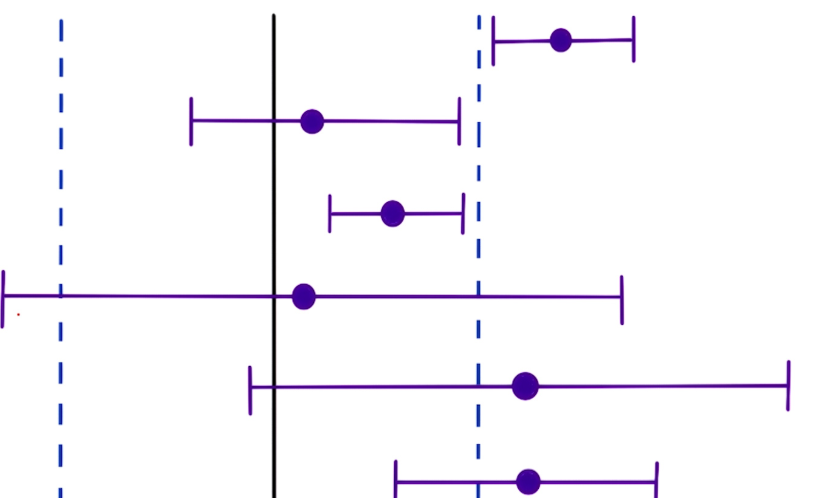

#### Recommendations for conclusions:

1) the change is significant, it is helpful to add the new change

2) the change is not significant, since it overlaps with 0

3) the change is helpful but not significant enough

4) better to run new test

5) better to run new test

6) better to run new test

How to make decisions if no time to run new test? Usually ask the decision maker, be aware to take the risk because the data is uncertain; or use other factors besides the data.

# AB Testing - Lesson 2 - Ethics and Policy  <a class="anchor" id="ethics"></a>



## 1. Experiments

* Tuskegee Experiment
* Milgram Experiment
* Facebook Experiment



IRB: Institutional Review Boards



## 2. Principles

### Risk

Assess whether the risk of participant greater than the minimum risk?

E.g. Medical advise on the website: potentially larger than minimal risk



### Benefits

Assess the benefits brought by the experiment



###  Choice

What's the other choice for the participants other than using your website?



### Privacy

* Do the participants know what data are gathered from them?
* If the data is publicly released, will it be harmful to them?
* Do the participants expect the data to be confidential?





### Other questions

* Are users being informed?
* What use identifiers are tied to the data?
* What type of data is being collected?
* What is the level of confidentiality and security?





## 3. Information provided to users

Information that is ethically necessary to provide to users

* A Terms of Service(TOS) or a Privacy Policy



## 4. Internal Training

Information that is ethically necessary for anyone who runs A/B tests to know

* Which questions to consider when evaluating ethics
* Data Policy detailing acceptable data uses
* Principles to uphold


# AB Testing - Lesson 3 - Choosing Metrics <a class="anchor" id="choosing_metrics"></a>



## 1. Definition

### Invariant Checking

The metrics that shouldn't change across your experiment and your control

* Is total population the same
* Is the distribution the same
* You can use multiple metrics at this stage



### Evaluation

*  High level business metrics
  * How much revenue you make
  * What your market share is 
  * How many users you have
* Detailed Metrics
  * User experience with actually using your product
    * How long they stay on your page
* Number of metrics to use depend on the culture of the company



### How to define metrics?

* Come up with a high level concept for a metric
  * One sentence summary that everyone can understand like "Click Through Probability", "Active User", etc
* Figure out all of the nitty gritty details
  * What does active mean?
* Take all the data measurements and summarize them into a single metric
* You can group all metrics into a composite metrics using **Overall Evaluation Criterion**





## 2. Expanding the Customer Funnel

Here we use the example of the hypothetical company "Audacity".

* Homepage visits
* Exploring the site
  * \# users who view course list
  * \# users who view course details
* Create an account
  * \# users who enroll in a course
  * \# users who finish lesson 1, lesson 2, etc
  * \# users who sign up for coaching at various levels
* Completing a course
  * \# users who enroll in a second class
  * \# users who get jobs



Things to note:

* Different platforms: IOS, Android, Desktop
* Each stage is a metric: Count - \# users who reach that point
* Rates/Probability: \# (unique) users in current level / \# (unique) users in previous level
  * want to increase rate of progression
* **Rates are often better than probabilities for measuring the usability of a button**



Metrics that are **difficult** to measure:

* Don't have access to data
* Takes too long to calculate the metrics: e.g. whether student gets a job



## 3. Other techniques to define metrics

* External data
  * Survey
  * Academic Research



* Internal data
  * Use all of the existing data, e.g. logs
    * Retrospective/Observational analyses, running experiments
  * Gather new data: you can't answer from your existing data
    * User experience reasearch
    * Survey
    * Focus groups



Gather Additional Data

* User Experience Research(UER)
  * Can go deep
  * \# participants is small
  * Good for brainstorming
  * Can use special equipment(like eye tracking)
  * Need to validate the results using retrospective analyses
* Focus groups: bring potential users for a group discussion
  * Not as deep as UER
  * Can bring participants than UER
  * Get feedback on hypotheticals
  * If you have a skilled facilitator, you run the risk of group think and convergence on fewer opinions
* Surveys 
  * Not as deep as Focus groups
  * More participants than focus groups
  * Useful for metrics you can not directly measure
  * Can't directly compare to other results because users might not tell the truth and **population** for your survey might be different from other internal metrics



Examples of applying metrics

* Measure user engagement
  * Survey responses as proxy
  * UER to brainstorm
  * Retrospective analysis to see user behavior
* Decide whether to extend inventory
  * Focus groups to get ideas from users
  * External data to see what uses want on other shopping site
* Which ads get most views
  * External data
  * UER: Eye-tracking machine
  * Retrospective analysis





## 4. Metrics Definition and Capturing data

### Definition

* Fully define what data are we going to look at to actually compute the metric
* Given those events/data, how do I summarize my metric



### Build Intuition

E.g. Click-through rate > 10% is not realistic



### Capturing data

* The technology used for counting clicks in different browsers(e.g. IE, Safari) might be different. So the difference of CTR in different platform might not be due to the users but the underlying technoloigy



### Example: Defining a metric

High level metric: Click-through probability =\# users who click / \# users who visit

Detailed metric:

* Def 1 (unique): For each \<time interval\> ,   = \# cookies that click / \# cookies
* Def 2(unique) : = \# pageviews results in a click within \<time interval\> / \# pageviews
  * This data capture is usually easier than recording cookies and then later grouping by cookies
* Def 3: = \# clicks / \# pageviews (click-through rate)



### Which metrics have which problems

check the metrics that will stay the same under the following conditions

|                                                            | Def 1: Cookie prob | Def 2: Pageview prob | Def 3: Rate |
| :--------------------------------------------------------: | :----------------: | :------------------: | :---------: |
|                Double Click or Single Click                |         *          |          *           |             |
| Back button or  caches page(not generate second page view) |         *          |                      |             |
|              Click-tracking bug of Javascript              |                    |                      |             |

Note: For the click-tracking bug of missing clicks, all three metrics will be affected.





## 5. Filter and Segmenting data

* External Reason
  * Spam and fraud from competitors messing up your metrics
* Internal Reason
  * Your change only impacts a subset of your traffic (e.g. you don't want to internalize your change but just within English traffic)



### How to use the filters

* Compute a baseline value for your metric
* To figure out whether or not you are biasing your data
  * Slice your data, compute the metric on different disjoint sets



Filtering and segmenting data is usually good for evaluating definitions and building intuitions.

* You can look at how the different definitions vary by segments

Example:

* Metrics: Total active cookies over time
* Build cookies week-over-week plot: \# cookies now / \# cookies a week ago, which can smooth out the weekly variation
* Build year-over-year plot: if abnormal spike still exists, we dive into different segments of the population to see if one segment is causing the spike





## 6. Summary Metrics

* Categories of metrics
  - Sums and Counts
    - \# users who visited page
  - Distribution metrics: mean, median and percentiles
    - Mean age of users who completed a course
    - Median latency of page load
  - Probability and rates
    - Probability has 0 or 1 outcome in each case
    - Rate(two counts divided by each other) has 0 or more
  - Ratios(two numbers divided by each other) 
    - P(revenue-generating click) / P(any click)



* **Sensitivity**
  * Detect a change when you're testing your possible future options
  * Characterize the distribution
    * Do the retrospective analysis and plot the histogram
    * If it looks normal, mean and median is good
    * If one-sided or lopsided,  maybe try 25%, 75% or other percentile
  * * 
* **Robustness** 
  * Metric stays the same when changes happen but you don't care about
  * How to check?
    * Run new experiments
    * Look at the logs or history metrics



### Example: Measuring sensitivity and robustness

choose summary metric for latency of a video

* Draw density line for similar videos to make sure they are comparable
* Draw the summary metric, when checking robustness, they should stay the same under these videos

* Draw the summary metric, when checking sensitivity, they should be able to detect the trend



* **Variability**

To calculate a confidence interval, you need:

* Variance
* Distribution

|  Type of metric   |                       Distribution                       |      Estimated Variance       |
| :---------------: | :------------------------------------------------------: | :---------------------------: |
|    Probability    |                         Binomial                         | $\frac{\hat p (1-\hat p)}{N}$ |
|       mean        |                          Normal                          |   $\frac{\hat\sigma^2}{N}$    |
| median/percentile |                     depends on data                      |               d               |
| Count/difference  |                      Normal(maybe)                       |          Var(X)+Var           |
|       Rates       |                         Poisson                          |           $\bar x$            |
|      Ratios       | Depends on the distribution of nominator and denominator |            Depends            |



### Nonparametric Answers

* Easy to implement
* Computationally intensive
* E.g. Sign test



* **Empirical Variability**
  * **A versus A experiments**: Two control groups
    * If we observe too much variability in a metric in this experiment, the metric might be too sensitive
    * When to used
      * Compare results to what you expect (sanity check)
      * Estimate variance and calculate confidence
      * Directly estimate confidence interval
  * Bootstrap method
    * If the bootstrap estimate aligns with  the analytical estimate, move on
    * If not, run A/A test to check
  * Calculate a confidence interval empirically
    * For each experiment, calculate the difference in click-through probability between the two groups
    * Then use average of difference as point estimate and we can do it in two ways
      * Calculate the standard deviation of the differences and assume metric is **normally distributed**
      * Calculate an empirical confidence interval, making no assumptions about the distribution 
        * For a sample with 40 data points, the 95% CI should be [second smallest difference, second largest difference]

# AB Testing - Lesson 4 - Design An Experiment  <a class="anchor" id="design"></a>

* Choose "subject"
* Choose "population"
* Size
* Duration



## 1. Unit of Diversion

How to define a individual subject in the experiment?

* User ID (used for login)
  * Stable, unchanging (whether it's from website or app)
  * Personally identifiable
* Anonymous ID (cookie): some identifier randomly generated when logging in
  * Changes when you switch browser or device
  * Users can clear cookies
* Event: On every single event, you redecide whether that event is in the experiment or in the control
  * No consistent experience
  * Only appropriate when the changes are not user visible(e.g. change of a ranked list)



Less common options

* Device ID
  * Only available for mobile
  * Tied to specific device
  * Unchangeable by user
  * Personally identifiable
* IP address 
  * Changes when location changes



### Example

In the following table, "1" means if the user use the unit of diversion in the first column for the following events, they might be switched from experiment to control or vice versa. Blank means they will stay in the same group. "?" means not sure.

|            |                 Desktop Homepage                 |          Sign In          |  Visit Class   |  Watch Video(PC)   | Mobile(Auto SignIn) | Watch Video(mobile) |
| :--------: | :----------------------------------------------: | :-----------------------: | :------------: | :----------------: | :-----------------: | :-----------------: |
|  user-id   | Can't assign user to a group before they sign in |             1             |                |                    |                     |                     |
|   cookie   |                        1                         | ?(could clear the cookie) |       ?        |         ?          |          1          |          ?          |
|   event    |                        1                         |             1             |       1        |         1          |          1          |          1          |
| device-id  |                  Not applicable                  |      Not applicable       | Not applicable | Not     applicable |          1          |                     |
| IP Address |                        1                         |             ?             |       ?        |         ?          |          ?          |          ?          |







## 2. Consistency of Diversion

User-id: Users get consistent experience as long as they're signed in.

* E.g. how courses are being displayed

Cookies: Users get consistent experience as long as they use the same device

* Test the change across the sign-in and sign-out border. Change the layout of a page like the location of the sign in bar

IP address

* Change the host provider



### Example

Which unit of diversion will give enough consistency?

|              Experiment               | Event | Cookie | User-id |
| :-----------------------------------: | :---: | :----: | :-----: |
|    Change reducing video load time    |   1   |        |         |
|     Change button color and size      |       |   1    |         |
|    Change order of search results     |       |        |    1    |
| Add Instructor's notes before quizzes |   1   |        |         |

Note: 

* When user might not notice the change, we tend to use the event-based diversion



## 3. Ethics of Diversion

If using user id, we know that the data is identified

* Need informed consent

If using cookies,

* Might not  need informed consent



### Example

Which experiments might require additional ethical review?

* News letter prompt after starting course (user id diversion): No
  * No new information being collected 
  * Fine if original data collection was approved
* Newsletter prompt on course overview (cookie diversion): Yes
  * Depends: Are email addresses stored by cookie
  * Potentially impacts other data collection
  * The cookie is linked to the email address
* Changes courses overview page( cookie diversion)
  * Not a problem





## 4. Variability

The variability calculated empirically might be usually larger than the one calculated analytically because the **unit of analysis** is different from the unit of diversion.



### Unit of Analysis

Whatever the denominator of the metric is, 

*  If same as the unit of diversion(e.g. event-based diversion), then empirical result will be close to analytical result
* If not the same(e.g. the diversion is user-id or cookie), then these two results will be different



**Reasons of the difference**

* When diverted by event, we assume that each data we draw is independent
* When diverted by user-id, the data are divided by group and are correlated



So the conclusion is 

* When unit of analysis = unit of diversion, variability tends to be lower and closer to the analytical estimate





## 5. Choosing Population

* In A/B testing, we talk about the inter-user experiment
  * We got different people on the A side and B side

* If we think we think identify what population will be affected by the experiment, we might want target the experiment to that traffic
* Changing the population can also affect the variability as well



### Cohort

People who enter the experiment at the same time. We only look at the initial groups.

* Cohort is harder to analyze than population. They're going to take more data because you'll lose users
* When to use cohort
  * Looking for learning effects
  * Examining user retention
  * Want to increase user activity
  * Anything requiring user to be established 



**Example**: Audacity

Have existing course and change structure of lesson

Unit of diversion: user-id - but, can't run on all users in course 





## 6. Sizing

### How variability affect sizing

**Example 1**: Audacity includes promotions for coaching next to videos

Experiment: Change wording of message

Metric: Click-through rate = \# clicks / \# pageviews

Unit of diversion: pageview or cookie

Analytic variability won't change, but probably under estimate for cookie diversion

Empirical estimate with 5000 page views

​	By pageview: 0.00515

​	By cookie: 0.0119



To calculate size , assume SE ~ 1/sqrt(N)

If the practical significance boundary is $d_{min}=0.02$,

* Diverting by pageview needs: 2600 samples
* Diverting by cookie needs: 13900 samples





**Example 2**: Audacity changes order of courses on course list

Metric: click-through rate

Unit of diversion: cookie

Which strategies could reduce the number of pageview?

* Increase $d_{min}$, $\alpha$, $\beta$
* Change unit of diversion to page view
  * Makes unit of diversion same as unit of analysis to decrease the variability
  * But will less consistent experience be ok?
* Target experiment to specific traffic
  * Non-English traffic will dilute the results
  * Could impact choice of practical significance boundary
* Change metric to cookie-based click-through probability
  * Often doesn't make significant difference 
  * If there is a difference, variability would probably go down





### Sizing Triggering

Run a pilot to see whom in the population are being affected by your change



## 7. Duration

* What's the duration of the experiment to run
* When do I want to run the experiment
* What fraction of the traffic you are going to send through your experiment



### Duration vs. Exposure

**Example**

Size of an experiment: 1 million pageviews

Average traffic per day: 500,000 pageviews 

* First thought: We can run experiment for 2 days 
* But we might have weekly variation in traffic and metric
  * We can run on mix of weekend and weekday days
* For risky change, run longer with less traffic 



### When to limit exposure

Which experiments are risky enough that Audacity might want to limit the number of users exposed?

* Changes database : Yes, if this goes wrong, effects could be huge
* Change color of "Start now" button (low risk)
* Allows Facebook login
*  Changes order of courses on course list





## 8. Learning Effects

When you want to measure user learning or whether user has adapted to a change or not

Things to keep in mind for measuring user learning:

* Choose the unit of diversion correctly
* Dosage: How often do user see the change, probably use cohort rather than population
* Risk and duration
* Pre-periods(uniformity trials)
  * A/A tests to find system variability, user variability
  * Make sure that we don't have any difference in the population. The difference is due to experiment
* Post-periods(uniformity trials)
  * A/A tests after A/B test to attribute the difference to user learning that happen in the experiment period













 

# AB Testing - Lesson 5 - Analyzing Results <a class="anchor" id="results"></a>

* Sanity Checks
* Single Metric
* Multiple Metrics
* Gotchas





## 1. Sanity Checks

**Reasons for Sanity Check** (example)

* Something goes wrong in the experiment diversion and the experiment and control aren't comparable
* You set up the filter differently in the experiment and the control 
* Your data capture didn't capture the events that you want to look for in your experiment



To do this, we should check 

* Population sizing metrics based on your unit of diversion  to make sure the population in experiment and control are comparable 
* The invariant metrics: metrics that shouldn't change when you run your experiment



### Choosing invariant metrics

**Example 1**

|                                                              | \# signed in users | \# cookies | \# events | \# CTR on "Start now" | \# Time to complete |
| :----------------------------------------------------------: | :----------------: | :--------: | :-------: | :-------------------: | :-----------------: |
| Changes order of courses in course list (unit of diversion: user-id) |         1          |     1      |     1     |           1           |                     |
| Changes infrastructure to reduce load time (unit of diversion: event) |         1          |     1      |     1     |           1           |                     |

* For case 1, 
  * \# signed in users is a good population sizing metric
  * \# cookies and \# events are also good population sizing metrics unless users in the experiment group tend to clear their cookies more often than the control group
  * "Start Now" button shows before the course list so \# CTR should remain the same
  * Putting easier course at first might reduce the time to complete for the users
* For case 2,
  * \# events is good population sizing metric since it's the unit of diversion
  * \# signed in users and \# cookies are randomly assigned due to the events so they are also the population sizing metrics
  * People press" Start Now" before viewing the videos 
  * \# time complete is difficult to track in event-based diversion ( users might be assigned to control and experiment multiple times)



**Example 2**

Change location of sign-in button to appear on every page

Unit of diversion: cookie

Which metrics should make good invariants?

* \# events , \# cookies, \# users are good population sizing metrics
* CTR on "Start Now": No, because sign-in button in home page will affect CTR on "start now"
* Probability of enrolling: No, because users enroll after signing in 
* Sign-in rate: No, this is what we're trying to change
* Video load time : Yes. This is back-end thing.



### Checking invariants

**Example 1**

Run experiment for 2 weeks

Unit of diversion: cookie

If you notice that \# total control is not equal to \# total experiment, how would you figure out whether this difference is within expectations?

Given: Each cookies is randomly assigned to the control or experiment group with probability 0.5



Answer:

Like flipping a fair coin: heads = control, the number of heads follows a binomial distribution 

* Compute standard deviation of binomial with probability 0.5 of success
  * SD = sqrt(0.5*0.5/(\# total control+\# total experiment))
* Multiply by z-score to get margin of error
* Compute confidence interval around 0.5
* Check whether the observed fraction of successes falls within the interval
* If not in the interval, one good thing to check is to look at the day-by-day data. Compute the fraction of control group in each day to figure out whether it's a overall problem or a specific day problem



What to do?

* Talk to the engineers
* Try slicing(e.g. by platform) to see if one particular slice is weird
* Check age of cookies - does one group have more new cookies





Common scenarios that experiment and control don't match up

* data capture
  * Capture a new experience the user is undergoing. Maybe the change is rare in experiment but more in control
* Experiment setup
  * Maybe you set up a filter for experiment only but not for the control 
* Infrastructure







## 2. Single Metric

**Example**

Change color and placement of "Start Now" button 

Metric: Click-through rate

Unit of diversion: cookie

Check the videos to see the details.



Usually we can run two test,

* Binomial normal approximation for empirical result
* Sign test - nonparametric test
* If these two test's results are different, we need to dig deeper(e.g. weekday effect of weekend effect)





**Example**

Simpson's paradox in CTR

* Looking at the total aggregate result, the experiment group has a lower CTR
* But if breaking it down by new users and experienced users, the result is on the contrary
* Possible reason: changes might affect the new user and experienced user differently





## 3. Multiple Metrics

**Example**

Prompt students to contact coach more frequently

Metrics:

* Probability that student signs up for coaching
* How early students sign up for coaching
* Average price paid per student

If Audacity tracks all three metrics and does three separate significance tests (alpha=0.05), what is probability at least one metric will show a significant difference if there is no true difference?
$$
P(FP=0)=0.95^3=0.857
$$

$$
P(FP\geq 1)=1-0.857=0.143
$$

Here we assume these three metrics are independent, but actually they are related. So this is an overestimate of the probability of a false positive.

* Probability of any false positive increases as you increase number of metrics
  * Solution: use higher confidence level for each metric
  * Method 1: Assume independence and set alpha separately for each metric
  * Method 2: Bonferroni correction
    * Simple
    * No assumptions
    * Conservative



**Example**

Update description on course list

Check the videos



Different strategies:

* Control probability that any metric shows a false positive
  * Family wise error rate (FWER)
* Control false discovery rate (FDR)
  * FDR=E[\# false positives / \# rejections]
  * Suppose you have 200 metrics, cap FDR at 0.05. This means you're okay with 5 false positives and 95 true positives in every experiment
  * If you want to detect a significant change across a number of metrics, cap the FDR instead of FWER







## 4. Conclusion

If you get significant result, ask yourself

* Do you understand the change	
  * When one is significant and the other one is not significant
  * When one is positive change while the other one is negative change
* Do you want to launch the change
  * Do I have statistically significant and practically significant results to launch the change
  * Do I understand what the change has done with the user experience
  * Is it worth it



### Gotchas

* Remove all the filters and do a ramp-up to see incidental change on the unaffected users that you didn't test in the original experiment









 